In [16]:
import pandas as pd 
import numpy as np
import tensorflow

In [109]:
df = pd.read_csv(r"D:\Neural networks\Alphabets_data.csv")

In [110]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [112]:
df.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [113]:
# spliting the train data and target data 

x = df.iloc[:,1:]

In [114]:
y = df.iloc[:,0]

In [118]:
y.nunique()

26

In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [138]:
y

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [125]:
# scaling the data 

x_train = scaler.fit_transform(x_train)

In [126]:
x_test = scaler.transform(x_test)

In [127]:
x_train.shape

(16000, 16)

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout

In [250]:
# intilaizing ANN 
classifier = Sequential()

In [251]:
# Adding the input layer
from keras.layers import Flatten

classifier.add(Flatten(input_shape=(16,)))

In [252]:
# Adding the first input layer

classifier.add(Dense(units = 10,activation='relu'))

In [253]:
# Adding the second input layer

classifier.add(Dense(units = 18,activation='relu'))

In [254]:
#classifier.add(Dense(units = 7,activation='sigmoid'))

In [255]:
#classifier.add(Dense(units = 5,activation='relu'))

In [256]:
#classifier.add(Dense(units = 3,activation='sigmoid'))

In [257]:
# Adding the output layer
classifier.add(Dense(26,activation='softmax'))

In [258]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [259]:
classifier.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [260]:
#Early stopping 

earlystopping = tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [266]:
history = classifier.fit(x_train, y_train, validation_split=0.33,epochs=10)

Epoch 1/10
335/335 [==============================] - 1s 2ms/step - loss: 0.6234 - accuracy: 0.8035 - val_loss: 0.6348 - val_accuracy: 0.8084
Epoch 2/10
335/335 [==============================] - 1s 2ms/step - loss: 0.6112 - accuracy: 0.8076 - val_loss: 0.6565 - val_accuracy: 0.7961
Epoch 3/10
335/335 [==============================] - 0s 1ms/step - loss: 0.6098 - accuracy: 0.8067 - val_loss: 0.6728 - val_accuracy: 0.7987
Epoch 4/10
335/335 [==============================] - 0s 1ms/step - loss: 0.5953 - accuracy: 0.8094 - val_loss: 0.6403 - val_accuracy: 0.8097
Epoch 5/10
335/335 [==============================] - 0s 1ms/step - loss: 0.5915 - accuracy: 0.8154 - val_loss: 0.6404 - val_accuracy: 0.8118
Epoch 6/10
335/335 [==============================] - 0s 1ms/step - loss: 0.5968 - accuracy: 0.8131 - val_loss: 0.6459 - val_accuracy: 0.8033
Epoch 7/10
335/335 [==============================] - 0s 1ms/step - loss: 0.5792 - accuracy: 0.8179 - val_loss: 0.6580 - val_accuracy: 0.8069
Epoch 

In [267]:
classifier.evaluate(x_test, y_test)

125/125 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.8070


[0.625828742980957, 0.8069999814033508]

In [264]:
y_pred = classifier.predict(x_test)

In [265]:
y_pred

array([[6.4400840e-05, 1.7646133e-05, 1.0343438e-03, ..., 3.8121244e-09,
        2.2816601e-10, 2.8820038e-08],
       [3.4217748e-05, 4.4172657e-07, 2.4741425e-07, ..., 2.7542485e-06,
        2.7223418e-08, 1.0094875e-07],
       [1.8422670e-08, 3.1633840e-23, 4.4857686e-07, ..., 2.9051732e-11,
        2.8595554e-03, 1.6095955e-16],
       ...,
       [2.9792438e-06, 2.1217266e-21, 2.2687435e-07, ..., 1.8892715e-05,
        2.1123234e-03, 5.8501103e-14],
       [9.9979788e-01, 1.3811022e-11, 5.1331307e-07, ..., 3.7998099e-12,
        2.0055314e-12, 5.6437040e-07],
       [9.9771178e-01, 1.8292447e-14, 1.2066774e-06, ..., 3.3401832e-08,
        2.1213512e-13, 7.9889127e-05]], dtype=float32)

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

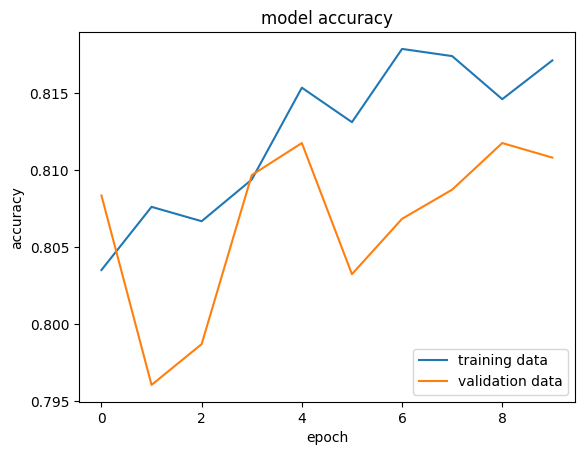

In [269]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

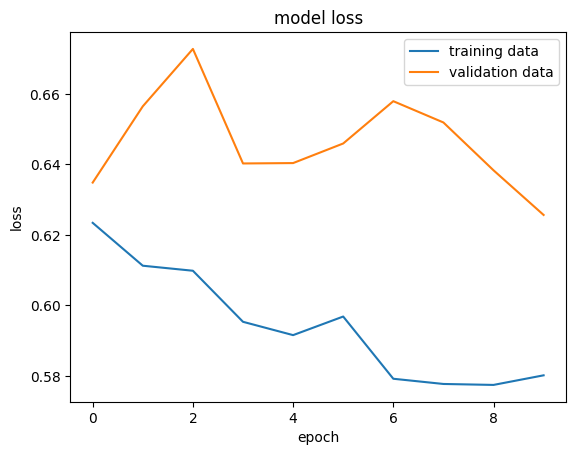

In [270]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [271]:
from sklearn.metrics import classification_report, accuracy_score

In [275]:
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Now you can use y_test and y_pred_labels to generate the classification report
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       162
           1       0.64      0.87      0.74       152
           2       0.81      0.81      0.81       144
           3       0.77      0.87      0.81       156
           4       0.58      0.88      0.70       139
           5       0.73      0.74      0.74       144
           6       0.59      0.60      0.60       154
           7       0.69      0.62      0.65       146
           8       0.83      0.86      0.84       138
           9       0.97      0.79      0.87       141
          10       0.59      0.82      0.69       137
          11       0.98      0.84      0.91       139
          12       0.89      0.81      0.84       145
          13       0.85      0.83      0.84       161
          14       0.76      0.79      0.77       173
          15       0.92      0.80      0.86       174
          16       0.71      0.88      0.79       159
          17       0.83    